<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.668006,43.623174,57.359934,-135.381776,57.269337,196.625618,-139.356281
1,0.0,1.0,86.838141,99.779289,20.191651,9.954097,226.763179,229.878347,-3.115168
2,0.0,2.0,24.214903,92.342839,57.583852,-31.076277,153.065316,174.529876,-21.464560
3,0.0,3.0,38.406655,48.857390,90.541274,-5.816363,181.988955,179.920497,2.068458
4,0.0,4.0,89.554468,94.303837,61.551255,-4.326059,251.083500,275.781937,-24.698436
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.935568,82.475526,20.742621,48.263107,240.416823,168.662656,71.754166
59996,999.0,56.0,62.484980,31.122712,26.298562,21.522034,151.428288,131.642178,19.786110
59997,999.0,57.0,71.722205,55.049330,92.510632,114.316236,343.598403,209.685931,133.912471
59998,999.0,58.0,70.368138,61.499791,78.115273,79.755872,299.739074,200.793375,98.945699


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.668006,43.623174,57.359934,-135.381776,57.269337,196.625618,-139.356281
1,0.0,1.0,86.838141,99.779289,20.191651,9.954097,226.763179,229.878347,-3.115168
2,0.0,2.0,24.214903,92.342839,57.583852,-31.076277,153.065316,174.529876,-21.464560
3,0.0,3.0,38.406655,48.857390,90.541274,-5.816363,181.988955,179.920497,2.068458
4,0.0,4.0,89.554468,94.303837,61.551255,-4.326059,251.083500,275.781937,-24.698436
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.935568,82.475526,20.742621,48.263107,240.416823,168.662656,71.754166
59996,999.0,56.0,62.484980,31.122712,26.298562,21.522034,151.428288,131.642178,19.786110
59997,999.0,57.0,71.722205,55.049330,92.510632,114.316236,343.598403,209.685931,133.912471
59998,999.0,58.0,70.368138,61.499791,78.115273,79.755872,299.739074,200.793375,98.945699


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    81.668006  43.623174  57.359934 -135.381776   57.269337   
      1.0    86.838141  99.779289  20.191651    9.954097  226.763179   
      2.0    24.214903  92.342839  57.583852  -31.076277  153.065316   
      3.0    38.406655  48.857390  90.541274   -5.816363  181.988955   
      4.0    89.554468  94.303837  61.551255   -4.326059  251.083500   
...                ...        ...        ...         ...         ...   
999.0 55.0   78.935568  82.475526  20.742621   48.263107  240.416823   
      56.0   62.484980  31.122712  26.298562   21.522034  151.428288   
      57.0   71.722205  55.049330  92.510632  114.316236  343.598403   
      58.0   70.368138  61.499791  78.115273   79.755872  299.739074   
      59.0   78.087911  22.529705  55.201413  -45.649017  120.170011   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    196.625618 -139.356281  
      1.0    229.878347   -3.115168  
      2.0    174.529876  -21.464560  
      3.0    179.920497    2.068458  
      4.0    275.781937  -24.698436  
...                 ...         ...  
999.0 55.0   168.662656   71.754166  
      56.0   131.642178   19.786110  
      57.0   209.685931  133.912471  
      58.0   200.793375   98.945699  
      59.0   158.370518  -38.200506  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    81.668006  43.623174  57.359934 -135.381776   57.269337   
      1.0    86.838141  99.779289  20.191651    9.954097  226.763179   
      2.0    24.214903  92.342839  57.583852  -31.076277  153.065316   
      3.0    38.406655  48.857390  90.541274   -5.816363  181.988955   
      4.0    89.554468  94.303837  61.551255   -4.326059  251.083500   
...                ...        ...        ...         ...         ...   
999.0 55.0   78.935568  82.475526  20.742621   48.263107  240.416823   
      56.0   62.484980  31.122712  26.298562   21.522034  151.428288   
      57.0   71.722205  55.049330  92.510632  114.316236  343.598403   
      58.0   70.368138  61.499791  78.115273   79.755872  299.739074   
      59.0   78.087911  22.529705  55.201413  -45.649017  120.170011   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    196.625618 -139.356281  
      1.0    229.878347   -3.115168  
      2.0    174.529876  -21.464560  
      3.0    179.920497    2.068458  
      4.0    275.781937  -24.698436  
...                 ...         ...  
999.0 55.0   168.662656   71.754166  
      56.0   131.642178   19.786110  
      57.0   209.685931  133.912471  
      58.0   200.793375   98.945699  
      59.0   158.370518  -38.200506  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.668006,43.623174,57.359934,-135.381776,57.269337,196.625618,-139.356281
1,0.0,1.0,86.838141,99.779289,20.191651,9.954097,226.763179,229.878347,-3.115168
2,0.0,2.0,24.214903,92.342839,57.583852,-31.076277,153.065316,174.529876,-21.464560
3,0.0,3.0,38.406655,48.857390,90.541274,-5.816363,181.988955,179.920497,2.068458
4,0.0,4.0,89.554468,94.303837,61.551255,-4.326059,251.083500,275.781937,-24.698436
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.935568,82.475526,20.742621,48.263107,240.416823,168.662656,71.754166
59996,999.0,56.0,62.484980,31.122712,26.298562,21.522034,151.428288,131.642178,19.786110
59997,999.0,57.0,71.722205,55.049330,92.510632,114.316236,343.598403,209.685931,133.912471
59998,999.0,58.0,70.368138,61.499791,78.115273,79.755872,299.739074,200.793375,98.945699


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    81.668006  43.623174  57.359934 -135.381776   57.269337   
      1.0    86.838141  99.779289  20.191651    9.954097  226.763179   
      2.0    24.214903  92.342839  57.583852  -31.076277  153.065316   
      3.0    38.406655  48.857390  90.541274   -5.816363  181.988955   
      4.0    89.554468  94.303837  61.551255   -4.326059  251.083500   
...                ...        ...        ...         ...         ...   
999.0 55.0   78.935568  82.475526  20.742621   48.263107  240.416823   
      56.0   62.484980  31.122712  26.298562   21.522034  151.428288   
      57.0   71.722205  55.049330  92.510632  114.316236  343.598403   
      58.0   70.368138  61.499791  78.115273   79.755872  299.739074   
      59.0   78.087911  22.529705  55.201413  -45.649017  120.170011   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    196.625618 -139.356281  
      1.0    229.878347   -3.115168  
      2.0    174.529876  -21.464560  
      3.0    179.920497    2.068458  
      4.0    275.781937  -24.698436  
...                 ...         ...  
999.0 55.0   168.662656   71.754166  
      56.0   131.642178   19.786110  
      57.0   209.685931  133.912471  
      58.0   200.793375   98.945699  
      59.0   158.370518  -38.200506  

[60000 rows x 7 columns]

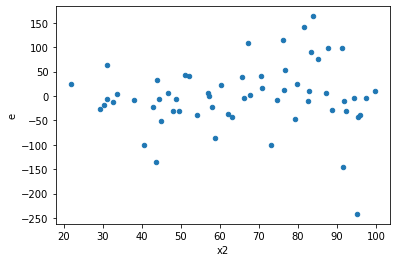

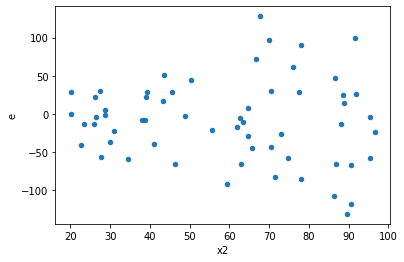

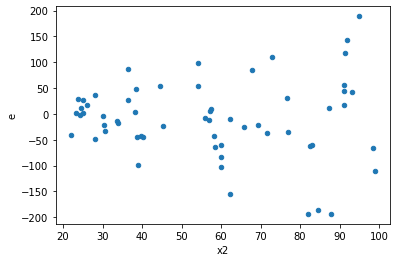

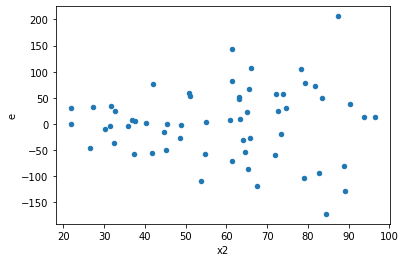

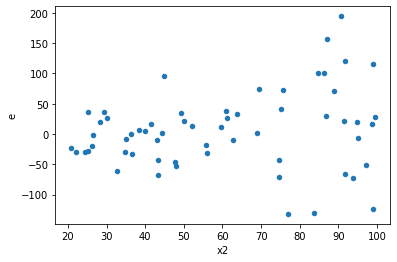

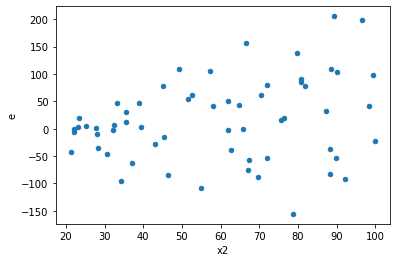

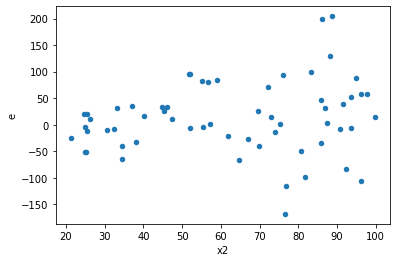

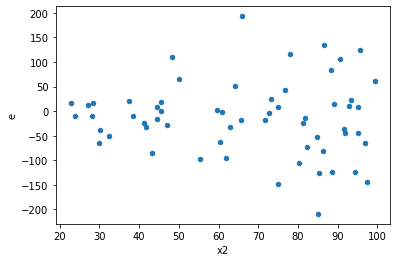

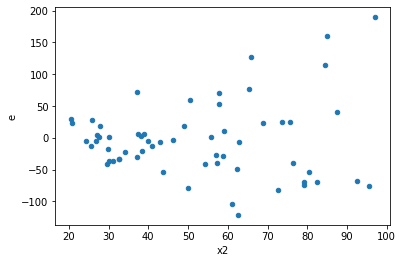

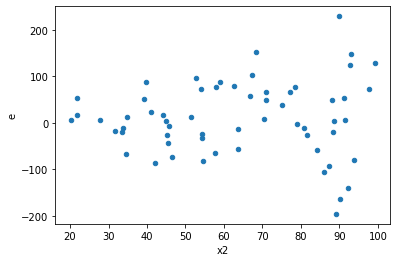

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,74120.60856550303,94815.64318907948,3529.5527888334777,4515.030628051403,1.279207564860824,0.577636240117283,0.7111818799413585,0.2888181200586415,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,53706.27930872274,76797.82763002225,2557.44187184394,3657.0394109534404,1.4299599342669242,0.41928614437709144,0.7903569278114543,0.20964307218854572,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,41242.16159839939,182377.9199928609,1963.9124570666377,8684.662856802901,4.422123208981826,0.0012404901532228063,0.9993797549233886,0.0006202450766114032,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,63095.1641759274,122307.3017313076,3004.531627425114,5824.1572253003615,1.9384576191969292,0.13742289839523747,0.9312885508023813,0.06871144919761873,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,20097.88258685646,174040.83898592423,957.0420279455457,8287.658999329726,8.659660450984166,6.412730803262434e-06,0.9999967936345984,3.206365401631217e-06,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,67387.97872299865,185328.57667507592,3208.9513677618406,8825.170317860759,2.750172659679814,0.02477218665760117,0.9876139066711994,0.012386093328800585,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,48584.80485389746,156368.8522543163,2313.562135899879,7446.13582163411,3.2184723747382185,0.009954071361705674,0.9950229643191472,0.004977035680852837,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,81475.92008099677,147510.6030430264,3879.8057181427034,7024.314430620305,1.810480972738734,0.1820582551592449,0.9089708724203776,0.09102912757962245,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,25886.646762691347,113942.39694206699,1232.697464890064,5425.828425812714,4.401589668472797,0.0012816620769946496,0.9993591689615027,0.0006408310384973248,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,74120.60856550303,94815.64318907948,3529.5527888334777,4515.030628051403,1.279207564860824,0.577636240117283,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,53706.27930872274,76797.82763002225,2557.44187184394,3657.0394109534404,1.4299599342669242,0.41928614437709144,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,41242.16159839939,182377.9199928609,1963.9124570666377,8684.662856802901,4.422123208981826,0.0012404901532228063,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,63095.1641759274,122307.3017313076,3004.531627425114,5824.1572253003615,1.9384576191969292,0.13742289839523747,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,20097.88258685646,174040.83898592423,957.0420279455457,8287.658999329726,8.659660450984166,6.412730803262434e-06,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,67387.97872299865,185328.57667507592,3208.9513677618406,8825.170317860759,2.750172659679814,0.02477218665760117,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,48584.80485389746,156368.8522543163,2313.562135899879,7446.13582163411,3.2184723747382185,0.009954071361705674,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,81475.92008099677,147510.6030430264,3879.8057181427034,7024.314430620305,1.810480972738734,0.1820582551592449,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,25886.646762691347,113942.39694206699,1232.697464890064,5425.828425812714,4.401589668472797,0.0012816620769946496,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      735
Reject001=0 : Heteroscedasticity    265
Name: Result_test, dtype: int64